# Major Project: Netflix Dataset Analysis

**PROBLEM STATEMENT:**
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.

The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.


**Dataset:** Netflix titles dataset (approx. 7,789 records, 11 columns). Expected CSV filename: `Netflix Dataset.csv`.

---



**Instructions:** Upload the `Netflix Dataset.csv` file into the same folder as this notebook.  
Then run all cells sequentially to generate analysis, visualizations, and insights.


Imports and Setup


In [3]:
# Imports and global settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Matplotlib display config
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# Path to dataset
DATA_PATH = 'Netflix Dataset.csv'


Load the Dataset

In [5]:
# Load dataset safely
import os
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print(f'✅ Dataset loaded successfully from: {DATA_PATH}')
    print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
else:
    raise FileNotFoundError(f"Dataset not found. Ensure {DATA_PATH} is in this folder.")

# Preview dataset
df.head()


✅ Dataset loaded successfully from: Netflix Dataset.csv
Rows: 7789, Columns: 11


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## 🧹 Data Cleaning and Preprocessing

In this section, we will:
1. Inspect dataset columns and missing values.  
2. Convert date columns.  
3. Clean categorical columns (`type`, `country`, `listed_in`).  
4. Extract numeric values from the `duration` column.  
5. Create new useful columns like `year_added` and `duration_val`.


In [6]:
# Checking structure and missing data
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nMissing values per column:")
print(df.isnull().sum())

df.info()


Dataset shape: (7789, 11)

Column names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing values per column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   

In [7]:
# Make column names clean and consistent
data = df.copy()
data.columns = [c.strip().lower().replace(' ', '_') for c in data.columns]

print("Renamed columns:")
print(data.columns.tolist())


Renamed columns:
['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [9]:
# --- Handle date and year columns safely ---
print("Available columns:", data.columns.tolist())

# Find the closest match for 'date_added' and 'release_year'
date_col = next((col for col in data.columns if 'date' in col.lower()), None)
release_col = next((col for col in data.columns if 'release' in col.lower()), None)

if date_col:
    data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
    data['year_added'] = data[date_col].dt.year
    print(f"✅ Converted '{date_col}' to datetime and extracted 'year_added'.")
else:
    print("⚠️ No column found containing 'date' — skipping conversion.")

if release_col:
    data[release_col] = pd.to_numeric(data[release_col], errors='coerce')
    print(f"✅ Converted '{release_col}' to numeric.")
else:
    print("⚠️ No column found containing 'release' — skipping conversion.")

# Show preview if at least one column was found
cols_to_show = [col for col in ['date_added', 'year_added', 'release_year'] if col in data.columns]
if cols_to_show:
    display(data[cols_to_show].head())
else:
    print("⚠️ None of the date/year columns found to preview.")


Available columns: ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']
✅ Converted 'release_date' to datetime and extracted 'year_added'.
✅ Converted 'release_date' to numeric.


year_added
0      2020.0
1      2016.0
2      2018.0
3      2017.0
4      2020.0

In [11]:
# Normalize 'type' column (Movie/TV Show)
if 'type' in data.columns:
    data['type'] = data['type'].str.strip()

# Split and clean genres (listed_in)
if 'listed_in' in data.columns:
    data['category'] = data['listed_in'].fillna('Unknown').apply(lambda x: [g.strip() for g in x.split(',')])

# Split and clean countries
if 'country' in data.columns:
    data['countries'] = data['country'].fillna('Unknown').apply(lambda x: [c.strip() for c in x.split(',')])

print("Categorical columns cleaned successfully.")
data[['type', 'category', 'countries']].head()


Categorical columns cleaned successfully.


type category        countries
0  International TV Shows, TV Dramas, TV Sci-Fi &...  TV Show         [Brazil]
1                       Dramas, International Movies    Movie         [Mexico]
2                Horror Movies, International Movies    Movie      [Singapore]
3  Action & Adventure, Independent Movies, Sci-Fi...    Movie  [United States]
4                                             Dramas    Movie  [United States]

In [12]:
# Extract numeric duration and unit
def parse_duration(x):
    if pd.isna(x):
        return (np.nan, None)
    parts = str(x).split()
    try:
        if 'min' in x:
            return (int(parts[0]), 'min')
        elif 'Season' in x or 'Seasons' in x:
            return (int(parts[0]), 'season')
    except:
        return (np.nan, None)
    return (np.nan, None)

if 'duration' in data.columns:
    parsed = data['duration'].apply(parse_duration)
    data['duration_val'] = parsed.apply(lambda t: t[0])
    data['duration_unit'] = parsed.apply(lambda t: t[1])

print("Duration column processed.")
data[['duration', 'duration_val', 'duration_unit']].head()


Duration column processed.


duration  duration_val duration_unit
0  4 Seasons             4        season
1     93 min            93           min
2     78 min            78           min
3     80 min            80           min
4    123 min           123           min

In [13]:
# Verify cleaned dataset
print("✅ Data cleaning complete!")
print("Columns now available:")
print(data.columns.tolist())

# Display sample
data.head(3)


✅ Data cleaning complete!
Columns now available:
['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description', 'year_added', 'countries', 'duration_val', 'duration_unit']


show_id category  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          release_date rating   duration  \
0  1597363200000000000  TV-MA  4 Seasons   
1  1482451200000000000  TV-MA     93 min   
2  1545264000000000000      R     78 min   

                                                type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  year_added    countries  \
0  In a future where the elite inhabit an island ...      2020.0     [Brazil]   
1  After a devastating earthquake hits Mexico Cit...      2016.0     [Mexico]   
2  When an army recruit is found dead, his fellow...      2018.0  [Singapore]   

   duration_val duration_unit  
0             4        season  
1            93           min  
2            78           min

## 🎬 Movies vs TV Shows Over the Years

We’ll now analyze how Netflix’s content distribution between **Movies** and **TV Shows** has changed over the years.


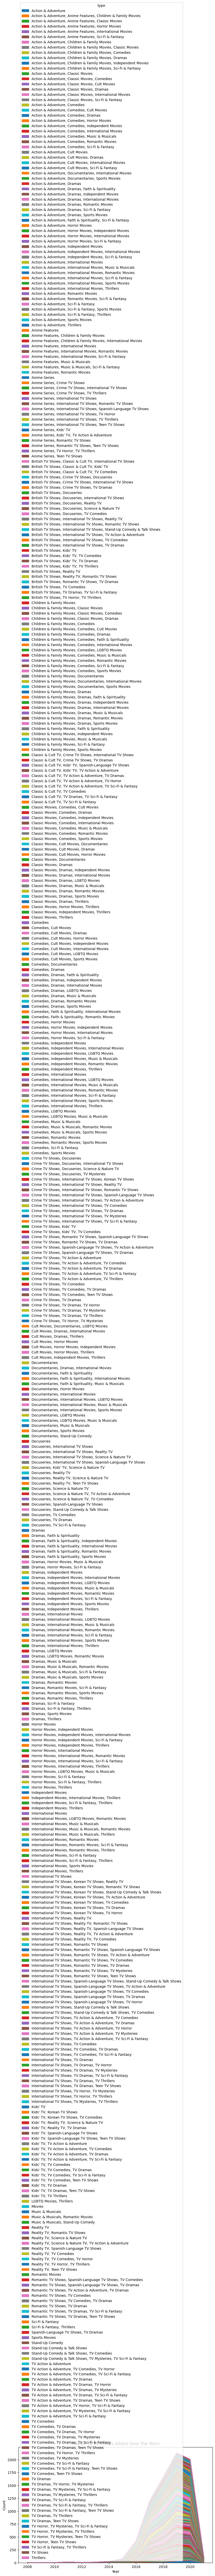

type        Action & Adventure  \
trend_year                       
2012.0                       0   
2013.0                       0   
2014.0                       0   
2015.0                       0   
2016.0                       2   
2017.0                      10   
2018.0                      11   
2019.0                      33   
2020.0                      39   
2021.0                       4   

type        Action & Adventure, Anime Features, Children & Family Movies  \
trend_year                                                                 
2012.0                                                      0              
2013.0                                                      0              
2014.0                                                      0              
2015.0                                                      0              
2016.0                                                      0              
2017.0                                                      0              
2018.0                                                      0              
2019.0                                                      0              
2020.0                                                      3              
2021.0                                                      0              

type        Action & Adventure, Anime Features, Classic Movies  \
trend_year                                                       
2012.0                                                      0    
2013.0                                                      0    
2014.0                                                      0    
2015.0                                                      0    
2016.0                                                      0    
2017.0                                                      0    
2018.0                                                      1    
2019.0                                                      0    
2020.0                                                      0    
2021.0                                                      0    

type        Action & Adventure, Anime Features, Horror Movies  \
trend_year                                                      
2012.0                                                      0   
2013.0                                                      0   
2014.0                                                      0   
2015.0                                                      0   
2016.0                                                      0   
2017.0                                                      1   
2018.0                                                      0   
2019.0                                                      0   
2020.0                                                      0   
2021.0                                                      0   

type        Action & Adventure, Anime Features, International Movies  \
trend_year                                                             
2012.0                                                      0          
2013.0                                                      0          
2014.0                                                      0          
2015.0                                                      0          
2016.0                                                      3          
2017.0                                                     12          
2018.0                                                      3          
2019.0                                                      7          
2020.0                                                      3          
2021.0                                                      0          

type        Action & Adventure, Anime Features, Sci-Fi & Fantasy  \
trend_year                                                         
2012.0                                                      0      
2013.0                             

In [14]:
# Select year for trend analysis
if 'year_added' in data.columns and data['year_added'].notna().sum() > 0:
    data['trend_year'] = data['year_added']
elif 'release_year' in data.columns:
    data['trend_year'] = data['release_year']
else:
    data['trend_year'] = np.nan

# Count per year by type
trend = data.dropna(subset=['trend_year', 'type']).groupby(['trend_year', 'type']).size().unstack(fill_value=0).sort_index()

# Plot trend
trend.plot.area()
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

trend.tail(10)


## 🎭 Genre Analysis

- Identify the top genres available on Netflix.  
- Visualize how genre popularity has changed across the years.


Top 15 Genres Overall:


category
Movie      5379
TV Show    2410
Name: count, dtype: int64

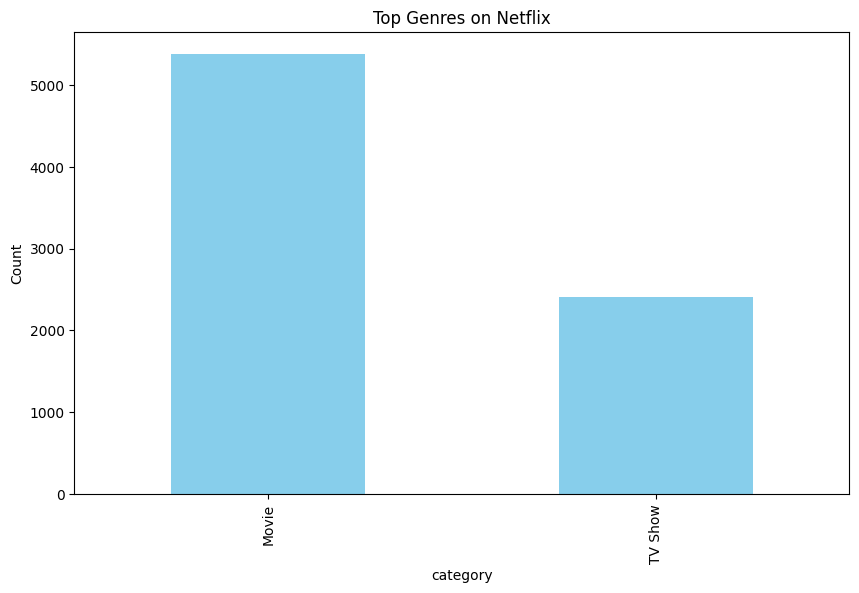

In [17]:
if 'category' in data.columns:
    genres_exploded = data[['trend_year', 'category']].explode('category')
    genres_exploded['category'] = genres_exploded['category'].fillna('Unknown')
    genre_counts = genres_exploded['category'].value_counts().head(15)

    print("Top 15 Genres Overall:")
    display(genre_counts)

    # Plot top genres
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title('Top Genres on Netflix')
    plt.xlabel('category')
    plt.ylabel('Count')
    plt.show()

else:
    print("No 'listed_in' or 'genres' column found.")


## 🌍 Country-Wise Contribution

Now, let’s examine which countries contribute the most titles to Netflix’s library.


Top 10 Contributing Countries:


countries
United States     3298
India              990
United Kingdom     723
Unknown            507
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Name: count, dtype: int64

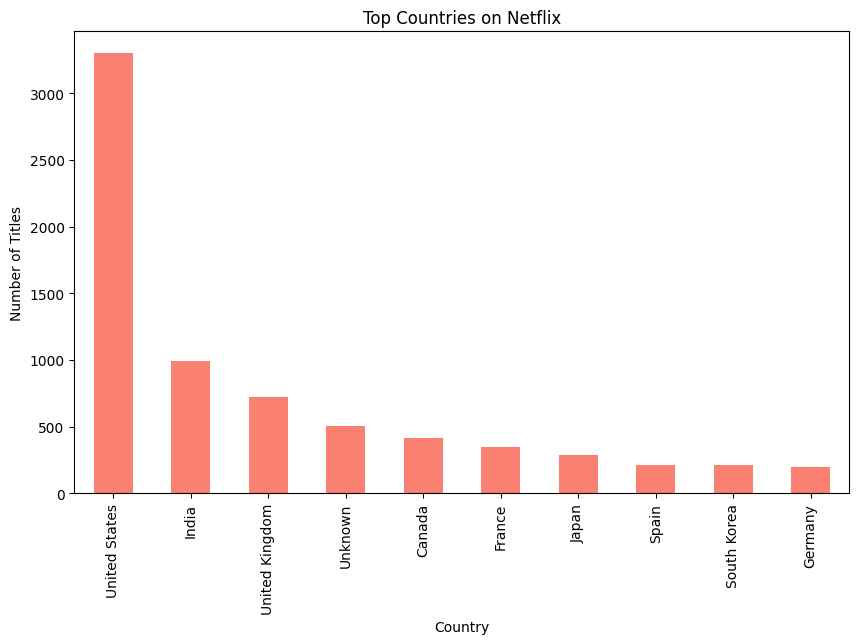

In [18]:
if 'countries' in data.columns:
    countries_exploded = data[['trend_year', 'countries']].explode('countries')
    countries_exploded['countries'] = countries_exploded['countries'].fillna('Unknown')

    country_counts = countries_exploded['countries'].value_counts().head(10)

    print("Top 10 Contributing Countries:")
    display(country_counts)

    country_counts.plot(kind='bar', color='salmon')
    plt.title('Top Countries on Netflix')
    plt.xlabel('Country')
    plt.ylabel('Number of Titles')
    plt.show()

else:
    print("No 'country' column found.")


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


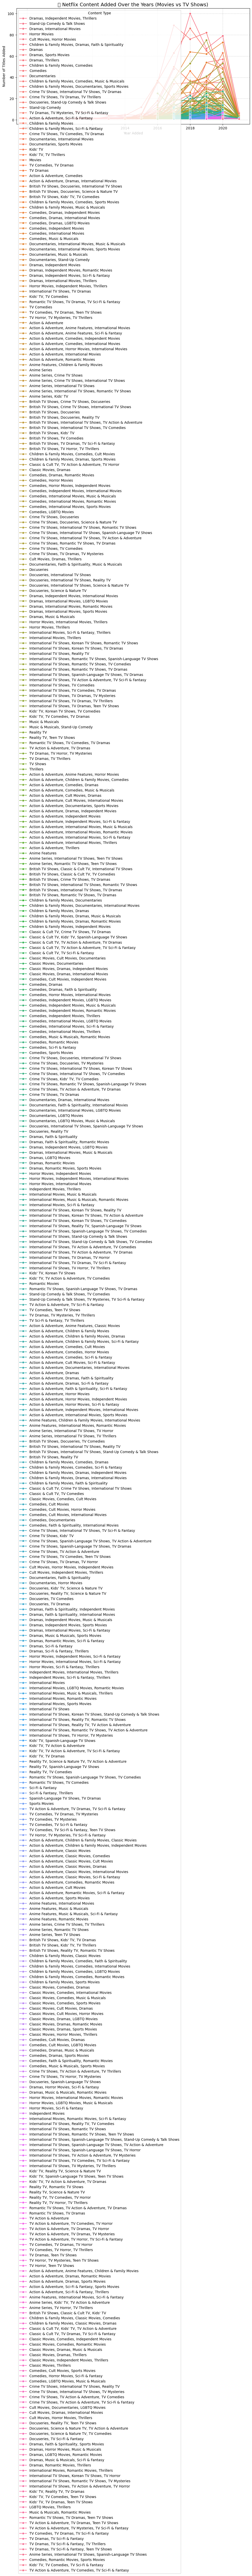

In [20]:
# Ensure date/year columns exist
if 'year_added' in data.columns and 'type' in data.columns:
    yearly_trend = data.groupby(['year_added', 'type']).size().reset_index(name='count')
    yearly_trend = yearly_trend.dropna(subset=['year_added'])

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly_trend, x='year_added', y='count', hue='type', marker='o')

    plt.title('📈 Netflix Content Added Over the Years (Movies vs TV Shows)', fontsize=14)
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles Added')
    plt.legend(title='Content Type')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("⚠️ Required columns ('year_added', 'type') not found in dataset.")


## 🎯 Conclusion & Strategic Recommendations

### Insights:
- **Movies dominate**, but TV Shows have grown significantly after 2015.  
- **Drama, Comedy, and Documentaries** are the most common genres.  
- The **United States** contributes the most titles, followed by **India, UK, and South Korea**.

### Recommendations:
1. **Invest more in regional productions** to attract diverse audiences.  
2. **Increase underrepresented genres** such as Sci-Fi and Thriller.  
3. **Focus on limited-series (short TV Shows)** for high binge-watch potential.  
4. **Expand international collaborations** to enhance global market presence.

---

✅ *This concludes the Netflix Dataset Analysis Project.*
